In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('daily_data.csv')
df2 = pd.read_csv('hourly_data.csv')
df3 = pd.read_csv('monthly_data.csv')
df4=pd.read_csv('three_hour_data.csv')

C:\Users\Tanay\AppData\Local\Temp\ipykernel_21332\127823146.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('hourly_data.csv')


### ANALYSE FIRST DATASET

In [3]:
df1

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


In [4]:
df1['DATE'] = pd.to_datetime(df1['DATE'], errors='coerce')
df1['WindEquipmentChangeDate'] = pd.to_datetime(df1['WindEquipmentChangeDate'], errors='coerce')

#### Convert DailyPrecipitation, DailySnowDepth, and DailySnowfall to numeric, coercing errors

In [5]:
df1['DailyPrecipitation'] = pd.to_numeric(df1['DailyPrecipitation'], errors='coerce')
df1['DailySnowDepth'] = pd.to_numeric(df1['DailySnowDepth'], errors='coerce')
df1['DailySnowfall'] = pd.to_numeric(df1['DailySnowfall'], errors='coerce')

#### Descriptive statistics

In [6]:
descriptive_stats = df1.describe()


#### Plotting

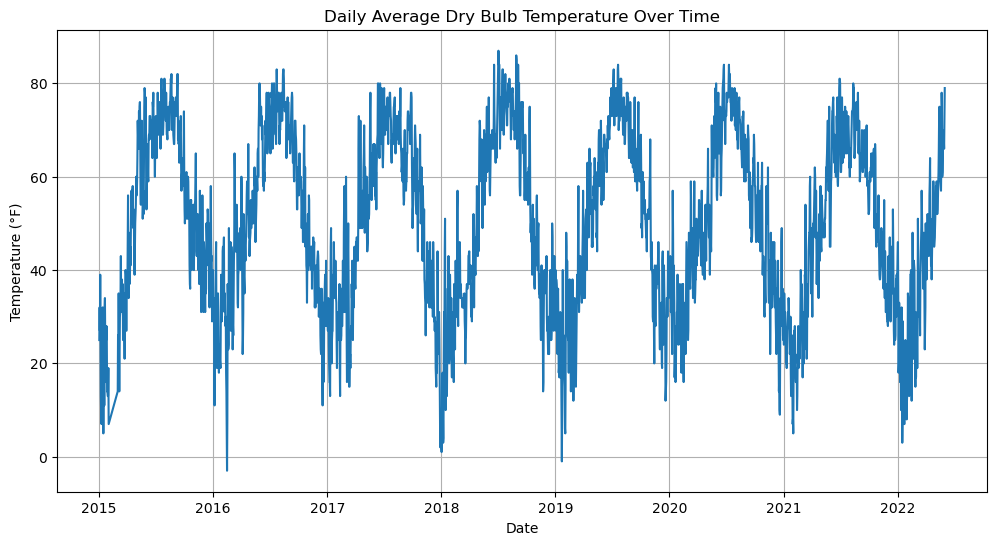

            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                          19.116250          

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='DailyAverageDryBulbTemperature', data=df1)
plt.title('Daily Average Dry Bulb Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

print(descriptive_stats)

#### PLOTTING HISTOGRAM

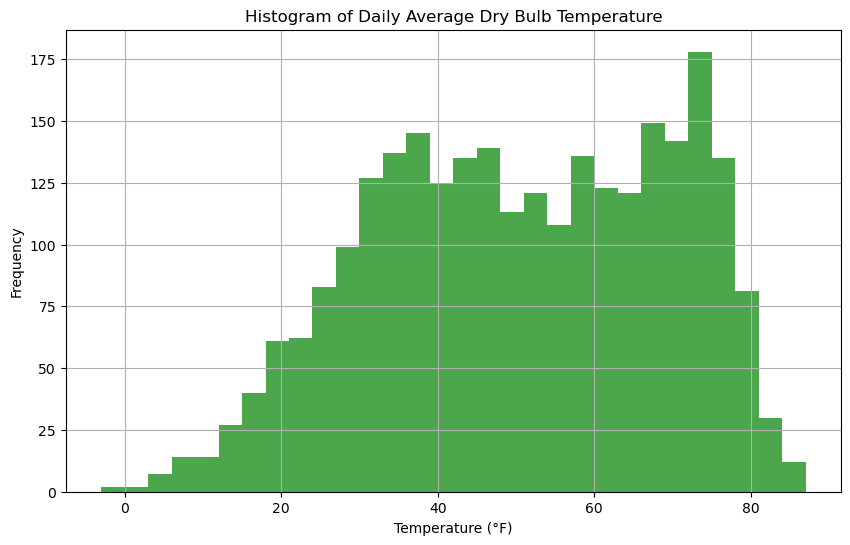

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df1['DailyAverageDryBulbTemperature'], bins=30, color='GREEN', alpha=0.7)
plt.title('Histogram of Daily Average Dry Bulb Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### PLOTTING BOXPLOT

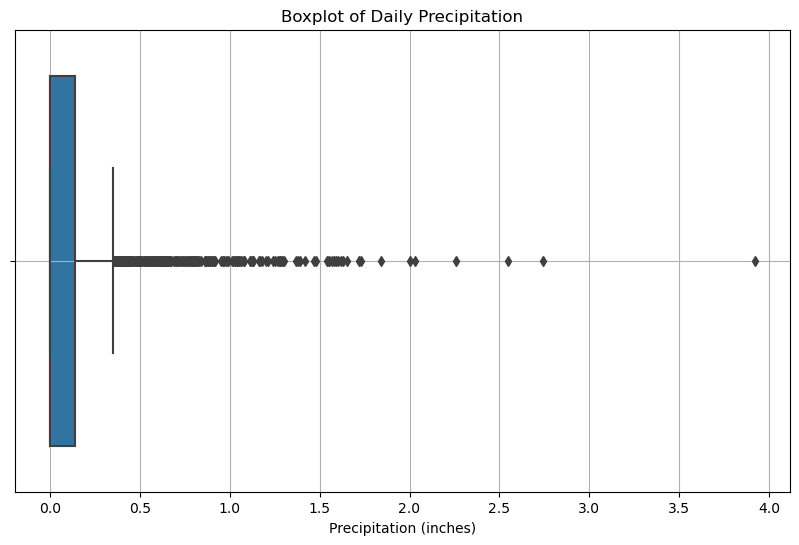

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['DailyPrecipitation'])
plt.title('Boxplot of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.grid(True)
plt.show()

#### Time Series Plot of Daily Snowfall

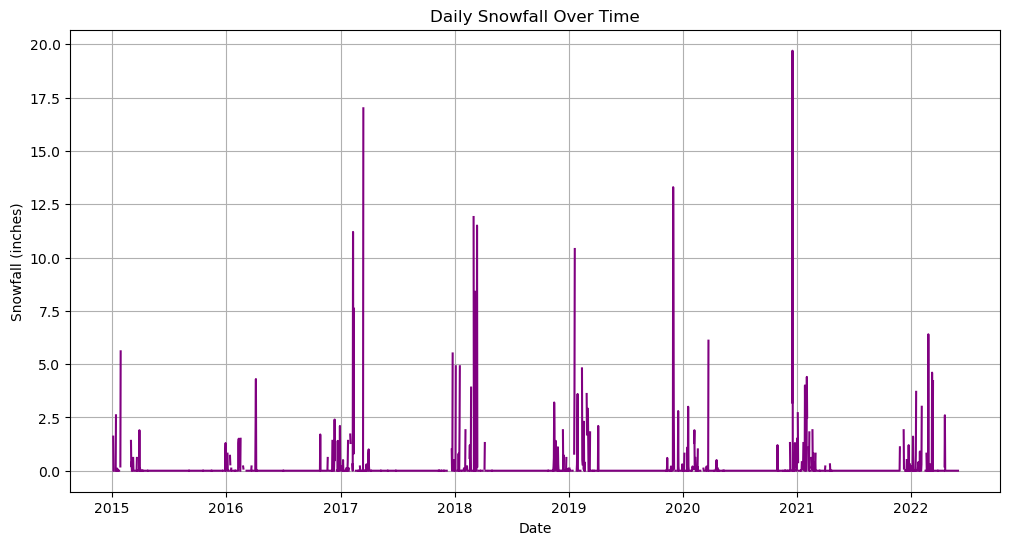

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df1['DATE'], df1['DailySnowfall'], color='purple')
plt.title('Daily Snowfall Over Time')
plt.xlabel('Date')
plt.ylabel('Snowfall (inches)')
plt.grid(True)
plt.show()

#### NOW LET'S ANALYSE NEXT DATASET

In [11]:
df2

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64724,72518014735,2022-05-31T19:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,76,0,62,29.91,29.61,10.0,67,360,10,9/8/2006
64725,72518014735,2022-05-31T20:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,73,0,62,29.93,29.62,10.0,64,360,9,9/8/2006
64726,72518014735,2022-05-31T21:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,70,0,66,29.94,29.64,10.0,63,350,7,9/8/2006
64727,72518014735,2022-05-31T22:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,68,0,68,29.94,29.64,10.0,62,340,8,9/8/2006


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64729 entries, 0 to 64728
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    64729 non-null  int64  
 1   DATE                       64729 non-null  object 
 2   REPORT_TYPE                64729 non-null  object 
 3   SOURCE                     64729 non-null  int64  
 4   BackupElements             64729 non-null  object 
 5   BackupElevation            64729 non-null  int64  
 6   BackupEquipment            64729 non-null  object 
 7   BackupLatitude             64729 non-null  float64
 8   BackupLongitude            64729 non-null  float64
 9   BackupName                 64729 non-null  object 
 10  HourlyAltimeterSetting     64729 non-null  object 
 11  HourlyDewPointTemperature  64729 non-null  object 
 12  HourlyDryBulbTemperature   64729 non-null  object 
 13  HourlyPrecipitation        64729 non-null  obj

#### Plotting temperature over time

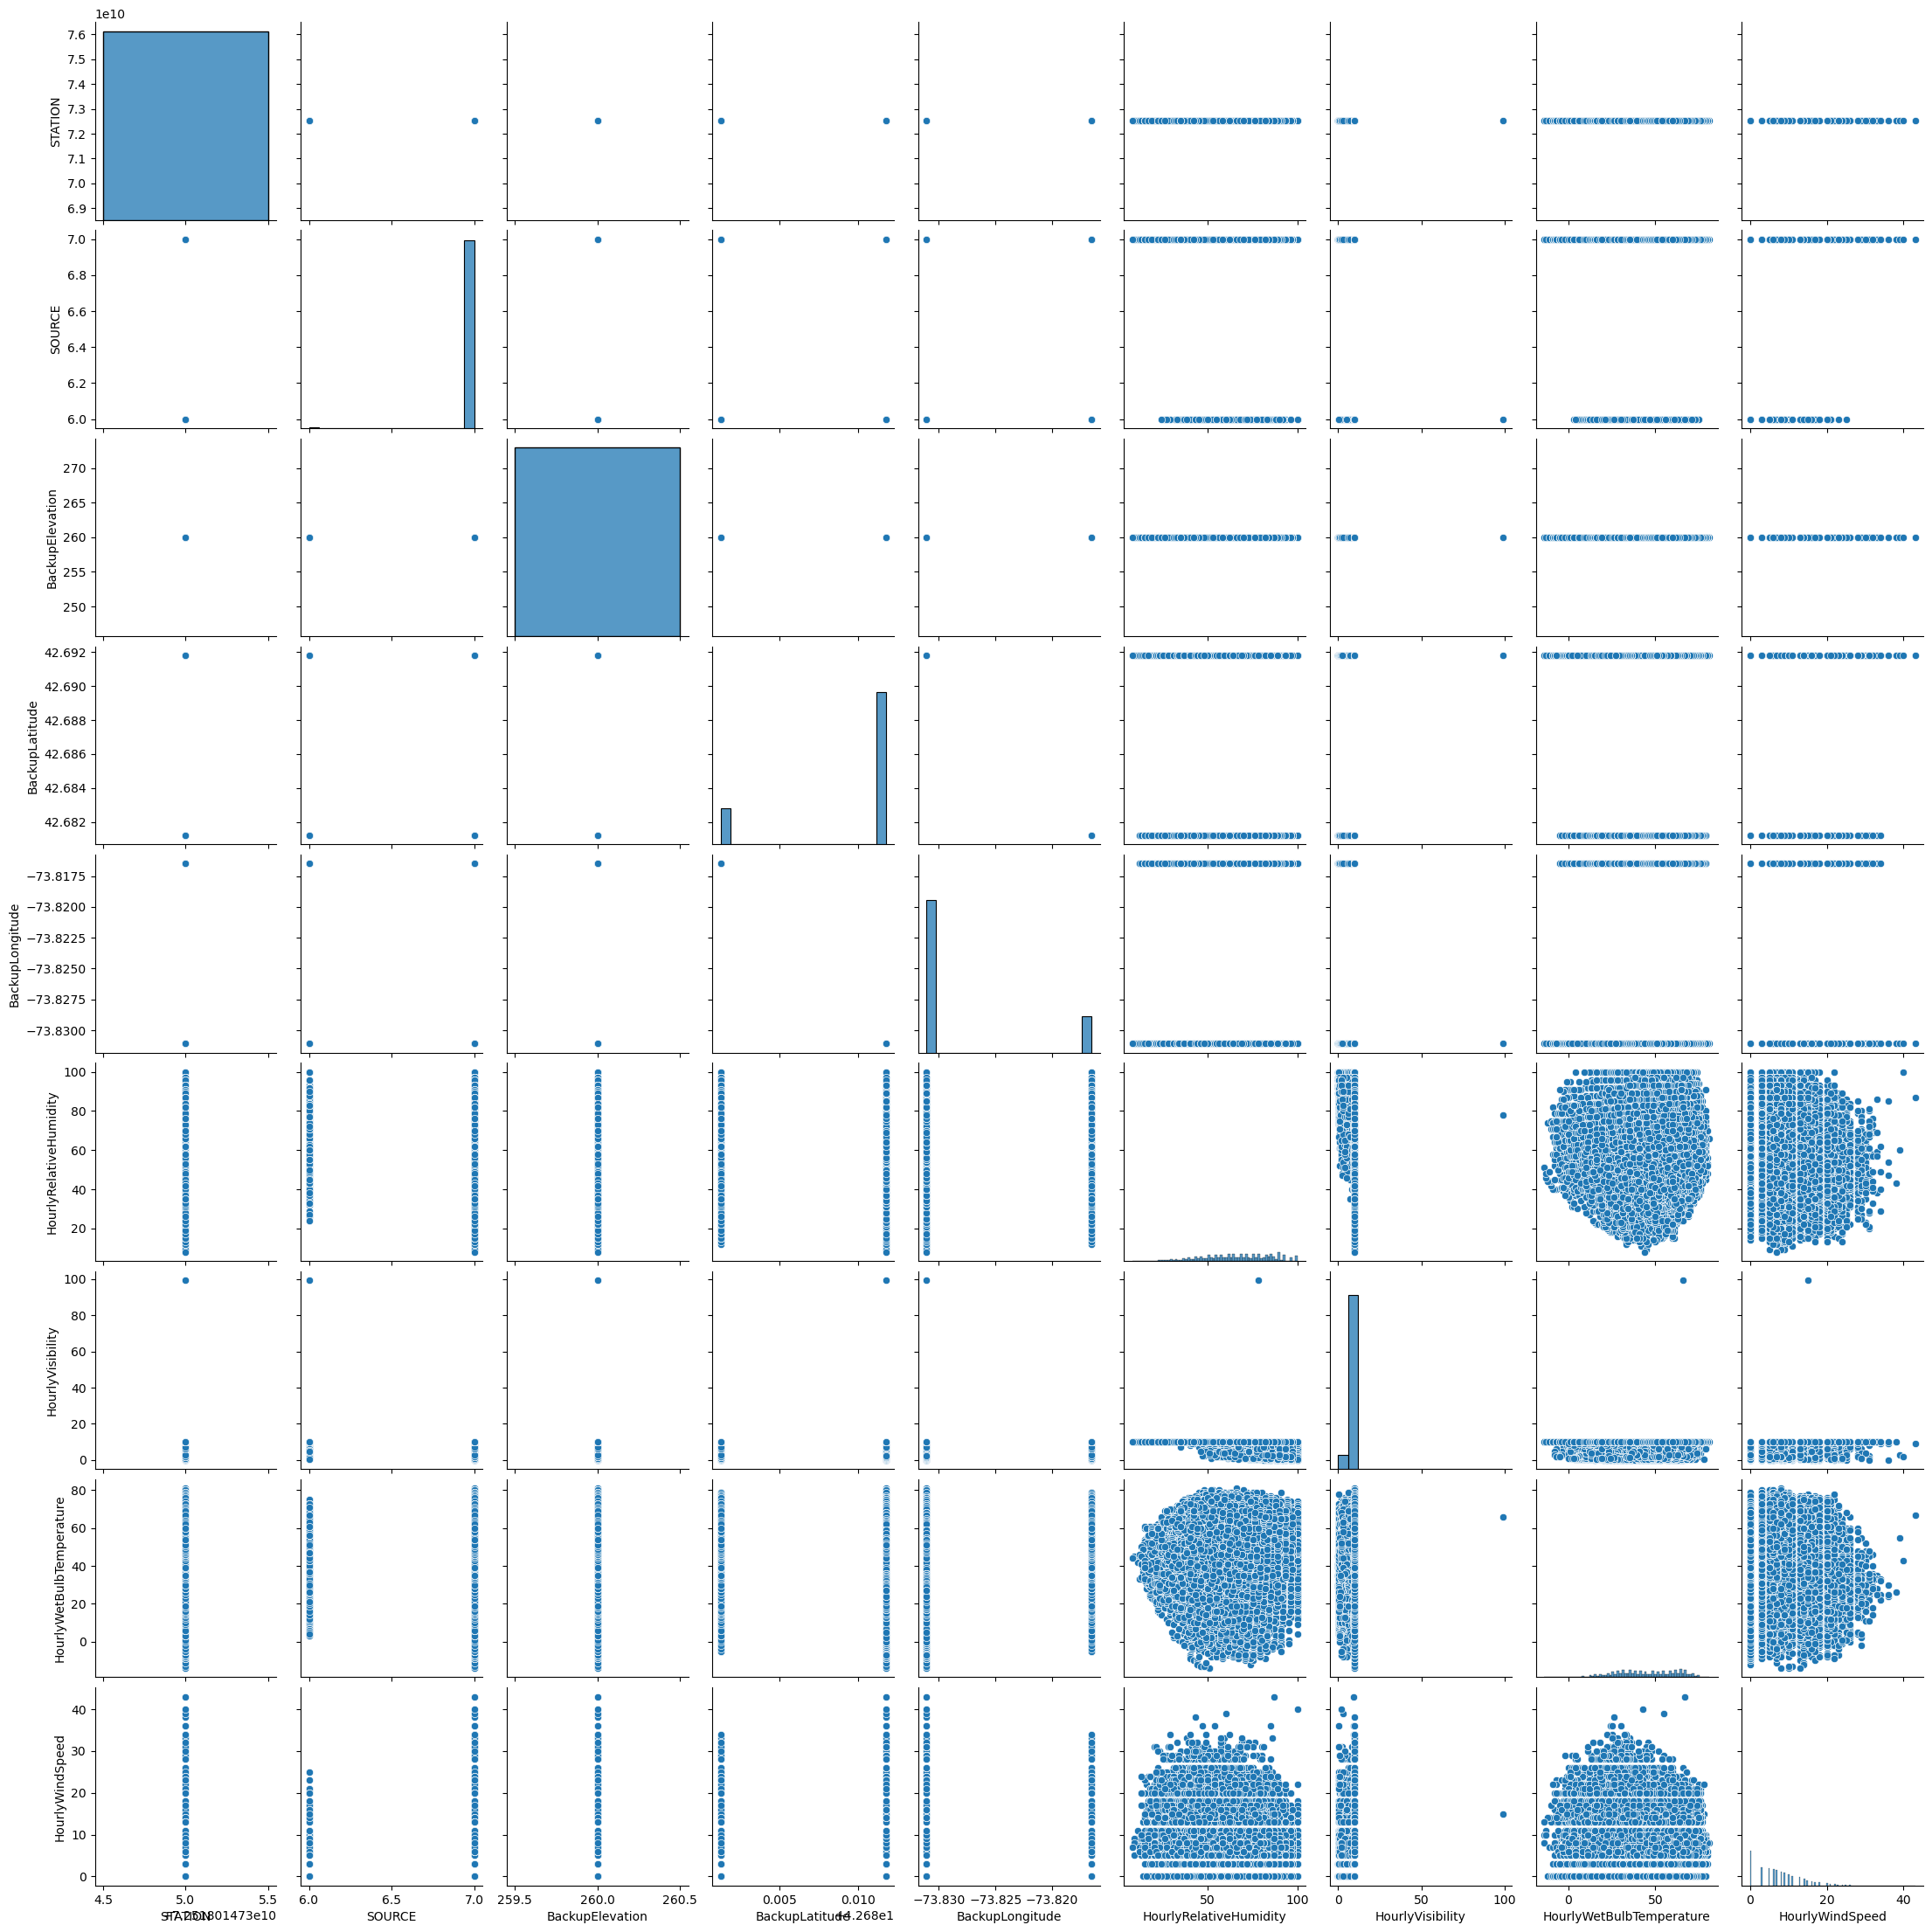

In [15]:
sns.pairplot(df2)

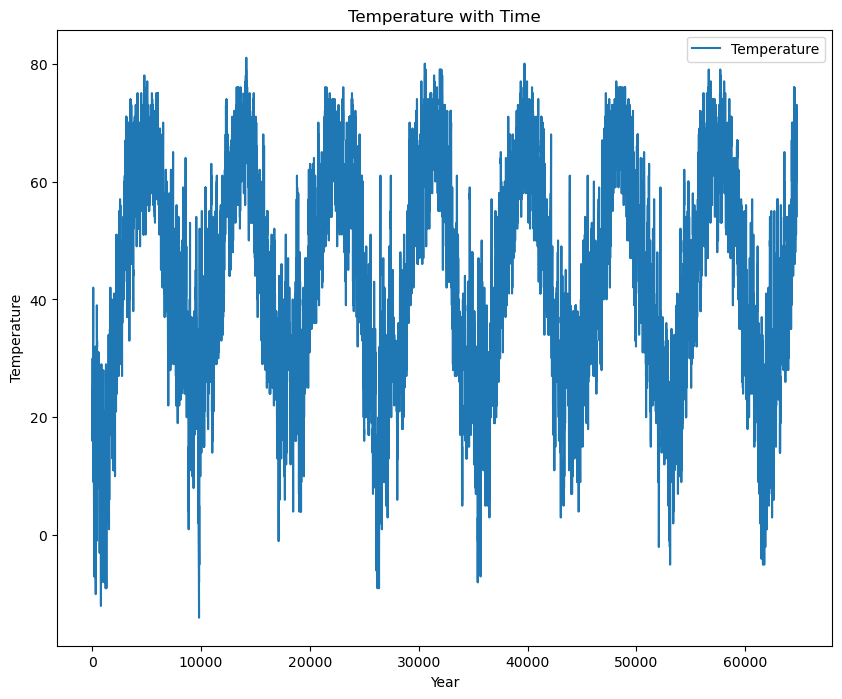

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(df2['HourlyWetBulbTemperature'], label='Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature with Time')
plt.legend()
plt.show()

### ANALYSING NEXT DATASET

In [16]:
df3

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72518014735,2022-01-31T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6812,-73.81650,...,19.7,28.98,17.0,1351.0,10.5,30.08,29.75,1.28,1316.0,2006-09-08
83,72518014735,2022-02-28T23:59:00,SOM,6,10.3,PRECIP,260,PLASTIC,42.6812,-73.81650,...,27.5,29.16,18.0,451.0,17.3,30.17,29.85,2.77,1093.0,2006-09-08
84,72518014735,2022-03-31T23:59:00,SOM,6,9.2,PRECIP,260,PLASTIC,42.6812,-73.81650,...,37.3,29.34,7.0,1951.0,27.4,29.98,29.33,3.35,929.0,2006-09-08
85,72518014735,2022-04-30T23:59:00,SOM,6,9.6,PRECIP,260,PLASTIC,42.6812,-73.81650,...,47.8,29.49,1.0,151.0,37.3,29.98,29.66,5.00,520.0,2006-09-08


In [18]:
df3.dtypes

STATION                                           int64
DATE                                             object
REPORT_TYPE                                      object
SOURCE                                            int64
AWND                                            float64
BackupElements                                   object
BackupElevation                                   int64
BackupEquipment                                  object
BackupLatitude                                  float64
BackupLongitude                                 float64
BackupName                                       object
CDSD                                            float64
CLDD                                            float64
DSNW                                            float64
HDSD                                            float64
HTDD                                            float64
MonthlyDaysWithGT001Precip                      float64
MonthlyDaysWithGT010Precip                      

In [19]:
filtered_data = df3[df3['MonthlyMaximumTemperature'] > 25]
print(filtered_data.head())

       STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0  72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
2  72518014735  2015-03-31T23:59:00       SOM         6   9.4         PRECIP   
3  72518014735  2015-04-30T23:59:00       SOM         6   9.4         PRECIP   
4  72518014735  2015-05-31T23:59:00       SOM         6   8.3         PRECIP   
5  72518014735  2015-06-30T23:59:00       SOM         6   7.4         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0              260         PLASTIC         42.6918        -73.83109  ...   
2              260         PLASTIC         42.6918        -73.83109  ...   
3              260         PLASTIC         42.6918        -73.83109  ...   
4              260         PLASTIC         42.6918        -73.83109  ...   
5              260         PLASTIC         42.6918        -73.83109  ...   

  MonthlyMeanTemperature  MonthlyMinSeaLevelPressureValue  \
0

#### LINE PLOT

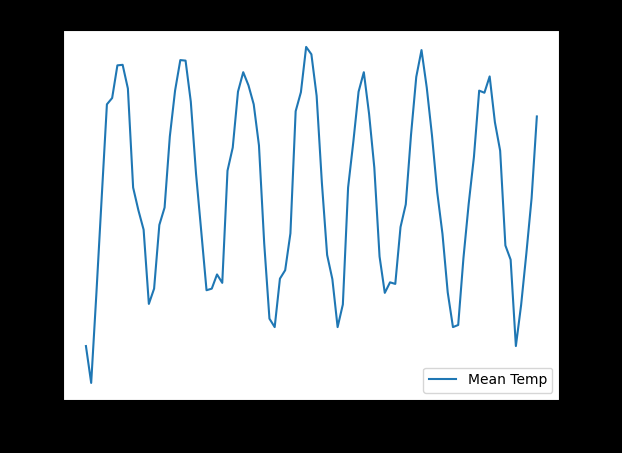

In [23]:
plt.figure(facecolor='BLACK')
plt.plot(df3['DATE'], df3['MonthlyMeanTemperature'], label='Mean Temp')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature Over Time')
plt.legend()
plt.show()

#### HISTOGRAM

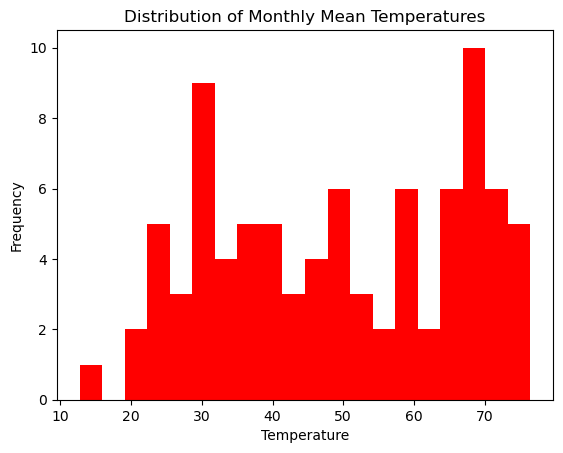

In [22]:
plt.figure(facecolor='white')
plt.hist(df3['MonthlyMeanTemperature'], bins=20, color='RED')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Mean Temperatures')
plt.show()

#### CORRELATION MATRIX

In [24]:
correlation_matrix = df3.corr()
print(correlation_matrix)

                                              STATION  SOURCE      AWND  \
STATION                                           NaN     NaN       NaN   
SOURCE                                            NaN     NaN       NaN   
AWND                                              NaN     NaN  1.000000   
BackupElevation                                   NaN     NaN       NaN   
BackupLatitude                                    NaN     NaN -0.015161   
BackupLongitude                                   NaN     NaN  0.015161   
CDSD                                              NaN     NaN -0.615182   
CLDD                                              NaN     NaN -0.598663   
DSNW                                              NaN     NaN  0.426503   
HDSD                                              NaN     NaN  0.652058   
HTDD                                              NaN     NaN  0.661903   
MonthlyDaysWithGT001Precip                        NaN     NaN -0.008857   
MonthlyDaysWithGT010Preci

C:\Users\Tanay\AppData\Local\Temp\ipykernel_21332\3590760072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


#### PAIRPLOT

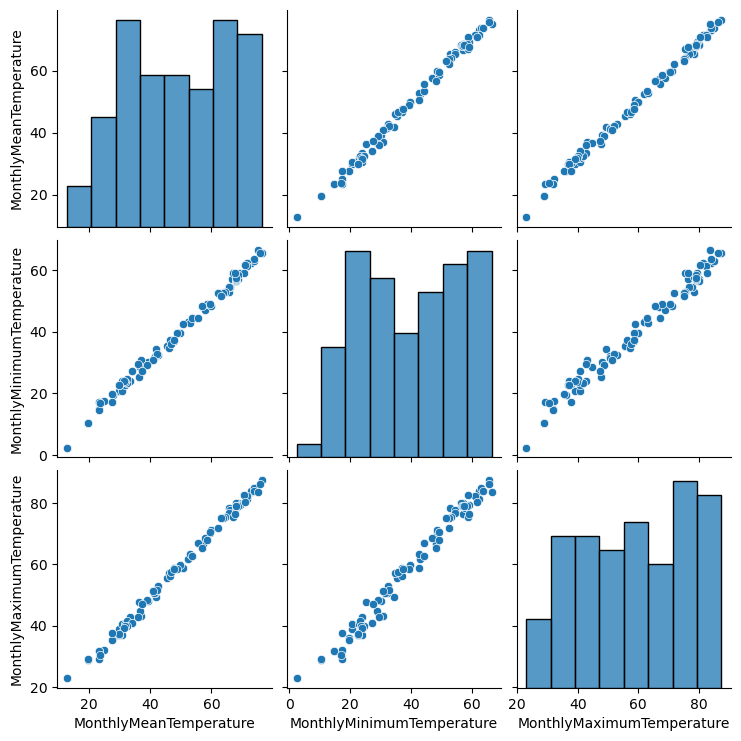

In [25]:
sns.pairplot(df3[['MonthlyMeanTemperature', 'MonthlyMinimumTemperature', 'MonthlyMaximumTemperature']])
plt.show()

#### COUNTING PLOT

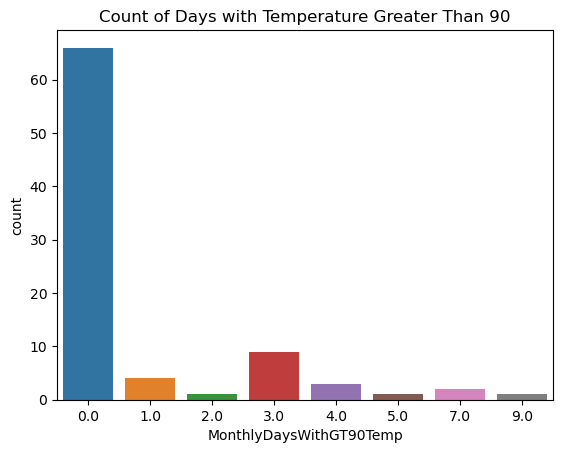

In [26]:
plt.figure(facecolor='white')
sns.countplot(x='MonthlyDaysWithGT90Temp', data=df3)
plt.title('Count of Days with Temperature Greater Than 90')
plt.show()

## SUMMARY

##### Monthly Maximum Temperature:

Count: 87
Mean: 58.79
Standard Deviation: 18.30
Minimum: 23.0
25th Percentile: 41.2
Median (50th Percentile): 58.7
75th Percentile: 76.55
Maximum: 87.4
Monthly Mean Temperature:

Count: 87
Mean: 49.23
Standard Deviation: 17.36
Minimum: 12.7
25th Percentile: 32.9
Median (50th Percentile): 48.9
75th Percentile: 66.45
Maximum: 76.5
Monthly Minimum Temperature:

Count: 87
Mean: 39.67
Standard Deviation: 16.51
Minimum: 2.4
25th Percentile: 24.35
Median (50th Percentile): 39.5
75th Percentile: 55.55
Maximum: 66.5